<a href="https://colab.research.google.com/github/roya90/KerasCampaign/blob/main/Keras_11_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment in text

 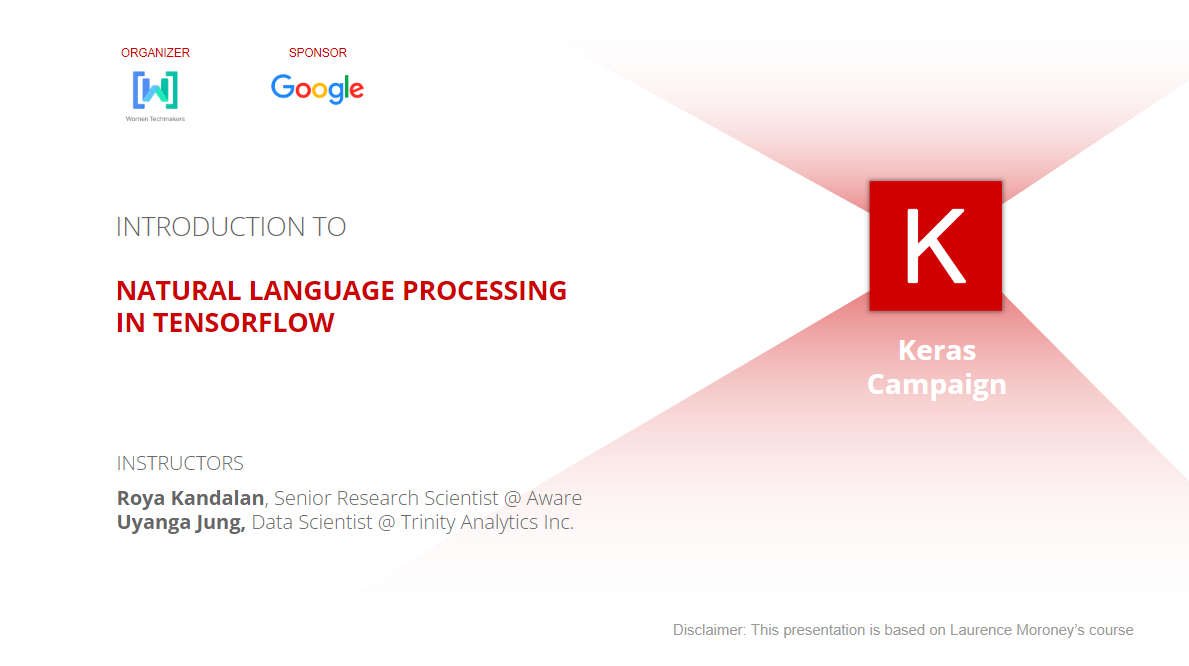

## Generating the vocabulary
In this notebook, you'll initially explore how to create a lookup dictionary for each word. The provided code processes a list of sentences, assigning an integer to every word in these sentences. This assignment is achieved through the `fit_on_texts()` method. You can view the outcomes via the word_index property. Words that appear more frequently are assigned a lower index.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# This code allows to print every word with it's index.
def find_key_by_value(dictionary, target_value):
    # Iterate over each key-value pair in the dictionary
    for key, value in dictionary.items():
        # Check if the current value matches the target value
        if value == target_value:
            # Return the key and value if a match is found
            return key, value
    # Return None if the target value is not found in the dictionary
    return None

In [ ]:
# Define input sentences
sentences = [
    'i love my dog',
    'I, love my cat'
    ]

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = 100)

# Generate indices for each word in the corpus
tokenizer.fit_on_texts(sentences)

# Get the indices and print it
word_index = tokenizer.word_index
print(word_index)

{'i': 1, 'love': 2, 'my': 3, 'dog': 4, 'cat': 5}


The initializer's `num_words` parameter sets the upper limit, minus one based on frequency, for the number of words retained in sequence creation. This will be more evident in an upcoming exercise. Currently, it's crucial to understand that this parameter doesn't influence the creation of the word_index dictionary. Experiment by substituting 1 for 100 in the subsequent cell; you'll notice the `word_index` remains unchanged.

Additionally, be aware that by default, all punctuation is excluded, and words are transformed into lowercase. These default behaviors can be altered by adjusting the filters and lower arguments in the Tokenizer class, as outlined here. In the following cell, try tweaking these settings and observe how the results differ from those previously obtained.

In [ ]:
# Define input sentences
sentences = [
    'i love my dog',
    'I, love my cat',
    'You love my dog!'
]

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = 10)

# Generate indices for each word in the corpus
tokenizer.fit_on_texts(sentences)

# Get the indices and print it
word_index = tokenizer.word_index
print(word_index)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}


In [ ]:
tokenizer.texts_to_sequences(["I love my bear!"])

[[3, 1, 2]]

Now check out what happens if we have a word that is not in our vocabulary?

In [ ]:
[find_key_by_value(word_index,i ) for i in tokenizer.texts_to_sequences(["I love my bear!"])[0]]

[('i', 3), ('love', 1), ('my', 2)]

## Generating Sequences and Padding

This section allows you to transform all the input sentences into a sequence of tokens. This process is accomplished through the use of the `texts_to_sequences()` method, as demonstrated in the following example.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define your input texts
sentences = [
    'I love my dog',
    'I love my cat',
    'I get treats for my cat!',
    "my dog and cat eat food!"
    'Do you think my dog is amazing?',
    "Thanks to my dog, my cat is happy!",
    "I am giving my dog treats"
]

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = 100, oov_token="<OOV>")

# Tokenize the input sentences
tokenizer.fit_on_texts(sentences)

# Get the word index dictionary
word_index = tokenizer.word_index

# Generate list of token sequences
sequences = tokenizer.texts_to_sequences(sentences)

# Print the result
print("\nWord Index = " , word_index)
print("\nSequences = " , sequences)


Word Index =  {'<OOV>': 1, 'my': 2, 'dog': 3, 'i': 4, 'cat': 5, 'love': 6, 'treats': 7, 'is': 8, 'get': 9, 'for': 10, 'and': 11, 'eat': 12, 'food': 13, 'do': 14, 'you': 15, 'think': 16, 'amazing': 17, 'thanks': 18, 'to': 19, 'happy': 20, 'am': 21, 'giving': 22}

Sequences =  [[4, 6, 2, 3], [4, 6, 2, 5], [4, 9, 7, 10, 2, 5], [2, 3, 11, 5, 12, 13, 14, 15, 16, 2, 3, 8, 17], [18, 19, 2, 3, 2, 5, 8, 20], [4, 21, 22, 2, 3, 7]]


In [ ]:
for p in sequences:
  print(p)
  print([  find_key_by_value(word_index,i ) for i in p])

[4, 6, 2, 3]
[('i', 4), ('love', 6), ('my', 2), ('dog', 3)]
[4, 6, 2, 5]
[('i', 4), ('love', 6), ('my', 2), ('cat', 5)]
[4, 9, 7, 10, 2, 5]
[('i', 4), ('get', 9), ('treats', 7), ('for', 10), ('my', 2), ('cat', 5)]
[2, 3, 11, 5, 12, 13, 14, 15, 16, 2, 3, 8, 17]
[('my', 2), ('dog', 3), ('and', 11), ('cat', 5), ('eat', 12), ('food', 13), ('do', 14), ('you', 15), ('think', 16), ('my', 2), ('dog', 3), ('is', 8), ('amazing', 17)]
[18, 19, 2, 3, 2, 5, 8, 20]
[('thanks', 18), ('to', 19), ('my', 2), ('dog', 3), ('my', 2), ('cat', 5), ('is', 8), ('happy', 20)]
[4, 21, 22, 2, 3, 7]
[('i', 4), ('am', 21), ('giving', 22), ('my', 2), ('dog', 3), ('treats', 7)]


In [ ]:
[find_key_by_value(word_index,i ) for i in tokenizer.texts_to_sequences(["Happy thanks giving, I love to eat Turkey!"])[0]]

[('happy', 20),
 ('thanks', 18),
 ('giving', 22),
 ('i', 4),
 ('love', 6),
 ('to', 19),
 ('eat', 12),
 ('<OOV>', 1)]

As discussed in the lecture, it's typically necessary to standardize the length of sequences to a uniform size, as this is a requirement for your model. The `pad_sequences` function can be utilized for this purpose. By default, it pads sequences to match the length of the longest one. However, you can specify a different length using the `maxlen` parameter. You are encouraged to experiment with the additional arguments presented in class and observe the varying outcomes.

In [ ]:
# Pad the sequences to a uniform length
padded = pad_sequences(sequences, maxlen=10)

# Print the result
print("\nPadded Sequences:")
print(padded)


Padded Sequences:
[[ 0  0  0  0  0  0  4  6  2  3]
 [ 0  0  0  0  0  0  4  6  2  5]
 [ 0  0  0  0  4  9  7 10  2  5]
 [ 5 12 13 14 15 16  2  3  8 17]
 [ 0  0 18 19  2  3  2  5  8 20]
 [ 0  0  0  0  4 21 22  2  3  7]]


In [ ]:
for p in padded:
  print(p)
  print([  find_key_by_value(word_index,i ) for i in p])

[0 0 0 0 0 0 4 6 2 3]
[None, None, None, None, None, None, ('i', 4), ('love', 6), ('my', 2), ('dog', 3)]
[0 0 0 0 0 0 4 6 2 5]
[None, None, None, None, None, None, ('i', 4), ('love', 6), ('my', 2), ('cat', 5)]
[ 0  0  0  0  4  9  7 10  2  5]
[None, None, None, None, ('i', 4), ('get', 9), ('treats', 7), ('for', 10), ('my', 2), ('cat', 5)]
[ 5 12 13 14 15 16  2  3  8 17]
[('cat', 5), ('eat', 12), ('food', 13), ('do', 14), ('you', 15), ('think', 16), ('my', 2), ('dog', 3), ('is', 8), ('amazing', 17)]
[ 0  0 18 19  2  3  2  5  8 20]
[None, None, ('thanks', 18), ('to', 19), ('my', 2), ('dog', 3), ('my', 2), ('cat', 5), ('is', 8), ('happy', 20)]
[ 0  0  0  0  4 21 22  2  3  7]
[None, None, None, None, ('i', 4), ('am', 21), ('giving', 22), ('my', 2), ('dog', 3), ('treats', 7)]


# Tokenizing the Sarcasm Dataset

In this exersice, apply what we discussed on the News Headlines Dataset for Sarcasm Detection. This dataset comprises news headlines that are categorized as either sarcastic or not.

## Download and inspect the dataset
First, download the dataset and check it out.

In [ ]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2023-11-16 01:34:40--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.119.207, 142.250.1.207, 108.177.121.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.119.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.06s   

2023-11-16 01:34:40 (93.7 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



The dataset is stored in a JSON file, and you can employ Python's json module to import it into your workspace. The following cell demonstrates how to extract the data from the JSON file and convert it into a list.

In [ ]:
import json

# Load the JSON file
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

You have the option to examine several items within the list. You'll observe that each item is a dictionary containing a URL link, the headline itself, and a label called is_sarcastic. Displayed below are two examples that showcase differing labels.

In [ ]:
# Initialize lists
sentences = []
labels = []
urls = []

# Append elements in the dictionaries into each list
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

# Non-sarcastic headline
print(datastore[0])

# Sarcastic headline
print(datastore[20000])

{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5', 'headline': "former versace store clerk sues over secret 'black code' for minority shoppers", 'is_sarcastic': 0}
{'article_link': 'https://www.theonion.com/pediatricians-announce-2011-newborns-are-ugliest-babies-1819572977', 'headline': 'pediatricians announce 2011 newborns are ugliest babies in 30 years', 'is_sarcastic': 1}


## Preprocessing the headlines

You can transform the above list of sentences into padded sequences by employing the same techniques you've mastered in previous exercises. The cell below is designed to create a `word_index` dictionary and produce a list of padded sequences for each of the 26,709 headlines, streamlining the process for efficient handling.

In [ ]:
tokenizer = Tokenizer(oov_token= "<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)
padded =  pad_sequences(sequences)#, padding= 'post')
padded.shape

(26709, 40)

In [ ]:
padded[0]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,   308, 15115,   679,  3337,  2298,    48,   382,  2576,
       15116,     6,  2577,  8434], dtype=int32)

In [ ]:
sentences[0]

"former versace store clerk sues over secret 'black code' for minority shoppers"

Try to see if you can find words that are out of vocabulary for this dataset.

# Training a binary classifier with the IMDB Reviews Dataset
In this excersie, you will build a model that classifies sentiments, tasked with classifying between positive and negative film critiques. You'll utilize the IMDB Reviews dataset for training and subsequently visualize the word embeddings created following the model's training.


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.14.0


##Download the Dataset
Initially, you must get the dataset for your project. This dataset is available through Tensorflow Datasets, which offers a variety of ready-to-use datasets for machine learning. Ensure that you have the tensorflow-datasets package installed on your local machine before importing it.

In [ ]:
import tensorflow_datasets as tfds

The `tfds.load` function retrieves the dataset and stores it in your current working directory. If you wish to view the dataset's description, you can adjust the `with_info` parameter to True. Moreover, the `as_supervised` parameter is utilized to load the data in the format of (input, label) pairs.

In [ ]:
imdb, infor = tfds.load("imdb_reviews", with_info=True, as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteFQ7LD2/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteFQ7LD2/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteFQ7LD2/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


## Split the dataset

When you print out the IMDB dataset you previously downloaded, you'll notice it includes a dictionary leading to `tf.data.Dataset` objects.

In [ ]:
import numpy as np

# Get the train and test sets
train_data, test_data = imdb['train'], imdb['test']

# Initialize sentences and labels lists
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

# Loop over all training examples and save the sentences and labels
for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

# Loop over all test examples and save the sentences and labels
for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

# Convert labels lists to numpy array
training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

## Generate Padded Sequences

You are now ready to apply the text preprocessing techniques you learned. This involves tokenizing the sentences and padding them to ensure they are of uniform length. The parameters for these steps have been organized into a separate code cell below, making it convenient for you to modify them later if needed.

In [ ]:
vocab_size = 10000
max_length = 120
embedding_dim = 16
trunc_type = 'post'
oov_tok = "<OOV>"

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)

# Generate the word index dictionary for the training sentences
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

# Generate and pad the test sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length, truncating=trunc_type)


## Build and Compile the Model

Now that your data is preprocessed, you can move on to constructing your model for sentiment classification. The initial layer of this model will be an `Embedding` layer. The core concept here is to represent each word in your vocabulary with vectors, which have weights that are adjustable during training. As the neural network learns, the words commonly found in positive tweets will evolve to have similar weights, while those in negative tweets will similarly group together. Further information about word embeddings can be explored here.

Following the `Embedding` layer, its output will be flattened and then fed into a `Dense` layer. The final layer of the model will be a single neuron with a sigmoid activation function, designed to distinguish between the two classes. In line with standard practice for binary classifiers, you'll employ `binary_crossentropy` as your loss function during the training process.

In [ ]:
import tensorflow as tf

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Setup the training parameters
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 6)                 11526     
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171533 (670.05 KB)
Trainable params: 171533 (670.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Train the Model

The subsequent step involves training your model. With the present configuration, expect to achieve nearly perfect accuracy in training within just 5 epochs, although the validation accuracy might level off at approximately 83%. Experiment with adjusting earlier parameters (like `vocab_size`, the number of neurons in the `Dense` layer, the number of `epochs`, etc.) to see if further improvements can be made.

In [ ]:
num_epochs = 10

# Train the model
model.fit(padded, training_labels_final, epochs=num_epochs, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
782/782 [==============================] - 42s 46ms/step - loss: 0.4935 - accuracy: 0.7409 - val_loss: 0.3772 - val_accuracy: 0.8305
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 0.2416 - accuracy: 0.9054 - val_loss: 0.4078 - val_accuracy: 0.8218
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 0.0950 - accuracy: 0.9747 - val_loss: 0.5141 - val_accuracy: 0.8080
Epoch 4/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0239 - accuracy: 0.9968 - val_loss: 0.5984 - val_accuracy: 0.8098
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.0060 - accuracy: 0.9996 - val_loss: 0.6743 - val_accuracy: 0.8078
Epoch 6/10
782/782 [==============================] - 5s 6ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.7363 - val_accuracy: 0.8097
Epoch 7/10
782/782 [==============================] - 6s 8ms/step - loss: 8.7388e-04 - accuracy: 1.0000 - val_loss: 0.7874 - val_accuracy: 0.8

In [ ]:
# Predict two new examples.

test_sequences = tokenizer.texts_to_sequences(["What an amazing movie!", "A total waste of my time."])
test_padded = pad_sequences(test_sequences,maxlen=max_length, truncating=trunc_type)
model.predict(test_padded)

1/1 [==============================] - 0s 113ms/step


array([[0.8639095 ],
       [0.00115293]], dtype=float32)

## Visualize Word Embeddings

Once the training is complete, you have the opportunity to visualize the trained weights of the Embedding layer to observe which words are grouped closely. The [TensorFlow Embedding Projector](https://projector.tensorflow.org/) is capable of reducing the 16-dimensional vectors you previously defined into a smaller number of components, enabling their projection. To begin this process, you must first retrieve these weights, which can be accomplished using the code in the following cell:

In [ ]:
# Get the embedding layer from the model (i.e. first layer)
embedding_layer = model.layers[0]

# Get the weights of the embedding layer
embedding_weights = embedding_layer.get_weights()[0]

# Print the shape. Expected is (vocab_size, embedding_dim)
print(embedding_weights.shape)

(10000, 16)


To proceed, you must create two essential files:



*   `vecs.tsv` - This file will hold the vector weights for each word in your vocabulary.
*   `meta.tsv` - This file will list all the words present in your vocabulary.

In this context, having a `reverse_word_index` dictionary is useful as it allows for quick word retrieval based on their respective indices. For instance, `reverse_word_index[1]` should return your Out Of Vocabulary (`OOV`) token, which is typically located at index 1. Conveniently, the `Tokenizer` class already includes this dictionary in its `index_word` property. Interestingly, this is the inverse of the `word_index` property you utilized earlier!

In [ ]:
# Get the index-word dictionary
reverse_word_index = tokenizer.index_word

In [ ]:
import io

# Open writeable files
out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')


# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, vocab_size):

  # Get the word associated at the current index
  word_name = reverse_word_index[word_num]

  # Get the embedding weights associated with the current index
  word_embedding = embedding_weights[word_num]

  # Write the word name
  out_m.write(word_name + "\n")

  # Write the word embedding
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()

In [ ]:
# Import files utilities in Colab
try:
  from google.colab import files
except ImportError:
  pass

# Download the files
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#KerasNLP

KerasNLP is a natural language processing library that works natively with TensorFlow, JAX, or PyTorch. Built on Keras Core, these models, layers, metrics, callbacks, etc., can be trained and serialized in any framework and re-used in another without costly migrations. See "Using KerasNLP with Keras Core" below for more details on multi-framework KerasNLP.

In [ ]:
%pip install keras_nlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.5/584.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 58.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 34.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: google-auth-oauthlib
    Found existing install

Similar to what we did before, we get the data from `tensorflow_datasets`

In [ ]:
import keras_nlp
import tensorflow_datasets as tfds

Using TensorFlow backend


 TensorFlow Datasets (TFDS) enalbe us to load the IMDB movie reviews dataset for sentiment analysis.



`split=["train", "test"]` specifies how the dataset should be split. In this case, it's divided into two parts: one for training (train) and one for testing (test). These splits are predefined in many TFDS datasets.


  `batch_size=16` specifies the number of samples per batch. When the dataset is iterated over, it will yield batches of 16 reviews at a time, rather than individual reviews. This is particularly useful for training models in batches, which is more efficient than training with single instances.

In [ ]:
imdb_train, imdb_test = tfds.load(
    "imdb_reviews",
    split=["train", "test"],
    as_supervised=True,
    batch_size=16,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteEE30PH/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteEE30PH/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteEE30PH/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


The line of code presented is a command to load a BERT (Bidirectional Encoder Representations from Transformers) model using the `keras_nlp` library, specifically for classification tasks. The `BertClassifier.from_preset` function is used to create an instance of a BERT classifier, named `classifier`, with predefined configurations. The first argument, `"bert_base_en_uncased"`, indicates that the base version of the BERT model with English uncased vocabulary is being used. This means the model does not distinguish between uppercase and lowercase letters (i.e., "uncased"`), a common practice to reduce model complexity and improve generalizability. The second argument, `num_classes=2`, specifies that the classifier is intended for a binary classification task (such as sentiment analysis), as it's set to differentiate between two classes. This line essentially initializes a BERT model tailored for a binary classification problem, leveraging the base, uncased version of the BERT architecture.

In [ ]:
# Load a BERT model.
classifier = keras_nlp.models.BertClassifier.from_preset(
    "bert_base_en_uncased",
    num_classes=2,
)

438162680/438162680 [==============================] - 6s 0us/step


In [ ]:
# Fine-tune on IMDb movie reviews.
classifier.fit(imdb_train, validation_data=imdb_test)

In [ ]:
# Predict two new examples.
classifier.predict(["What an amazing movie!", "A total waste of my time."])

1/1 [==============================] - 6s 6s/step


array([[-2.6891477,  2.917785 ],
       [ 2.626756 , -2.8670568]], dtype=float32)